## Projections

### Coordinate reference systems
The coordinate reference system (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

For reference codes of the most commonly used projections, see [spatialreference.org](https://spatialreference.org/).

The same CRS can often be referred to in many ways. For example, one of the most commonly used CRS is the WGS84 latitude-longitude projection. This can be referred to using the authority code *`"EPSG:4326"`*.

GeoPandas can accept anything accepted by [`pyproj.CRS.from_user_input()`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS.from_user_input):

- CRS WKT string
- An authority string (i.e. “epsg:4326”)
- An EPSG integer code (i.e. 4326)
- A [`pyproj.CRS`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS)
- An object with a to_wkt method.
- PROJ string
- Dictionary of PROJ parameters
- PROJ keyword arguments for parameters
- JSON string with PROJ parameters

For reference, a few very common projections and their EPSG codes:

- WGS84 Latitude/Longitude: EPSG:4326
- UTM Zones (North): EPSG:32633
- UTM Zones (South): EPSG:32733

### What is the best format to store the CRS information?
Generally, WKT or SRID’s are preferred over PROJ strings as they can contain more information about a given CRS. Conversions between WKT and PROJ strings will in most cases cause a loss of information, potentially leading to erroneous transformations. If possible WKT2 should be used.

For more details, see [What is the best format for describing coordinate reference systems](https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems).

### Setting a projection
There are two relevant operations for projections: setting a projection and re-projecting.

Setting a projection may be necessary when for some reason GeoPandas has coordinate data (x-y values), but no information about how those coordinates refer to locations in the real world. Setting a projection is how one tells GeoPandas how to interpret coordinates. If no CRS is set, GeoPandas geometry operations will still work, but coordinate transformations will not be possible and exported files may not be interpreted correctly by other software.

Be aware that most of the time you don’t have to set a projection. Data loaded from a reputable source (using the [`geopandas.read_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas.read_file) command) should always include projection information. You can see an objects current CRS through the [`GeoSeries.crs`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.crs.html#geopandas.GeoSeries.crs) attribute.

From time to time, however, you may get data that does not include a projection. In this situation, you have to set the CRS so GeoPandas knows how to interpret the coordinates.

For example, if you convert a spreadsheet of latitudes and longitudes into a GeoSeries by hand, you would set the projection by passing the WGS84 latitude-longitude CRS to the [`GeoSeries.set_crs()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.set_crs.html#geopandas.GeoSeries.set_crs) method (or by setting the [`GeoSeries.crs`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.crs.html#geopandas.GeoSeries.crs) attribute):

```python
my_geoseries = my_geoseries.set_crs("EPSG:4326")
my_geoseries = my_geoseries.set_crs(epsg=4326)
```

### Re-projecting
Re-projecting is the process of changing the representation of locations from one coordinate system to another. All projections of locations on the Earth into a two-dimensional plane have distortions. See [Which projection is best](https://en.wikipedia.org/wiki/Map_projection#Which_projection_is_best.3F) for more information. The projection that is best for your application may be different from the projection associated with the data you import. In these cases, data can be re-projected using the [`GeoDataFrame.to_crs()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html#geopandas.GeoDataFrame.to_crs) command:

In [1]:
import geodatasets
import geopandas

In [3]:
geodatasets.get_path('geoda.natregimes')

'/home/yousef/.cache/geodatasets/natregimes.zip'

In [14]:
# load example data
usa = geopandas.read_file(geodatasets.get_path('geoda.natregimes'))
usa.head()

,REGIONS,NOSOUTH,POLY_ID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,...,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,West,geometry
0,1.0,1.0,1,Lake of the Woods,Minnesota,27,077,27077,27,77,...,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,0,"POLYGON ((-95.34258 48.54670, -95.34081 48.715..."
1,2.0,1.0,2,Ferry,Washington,53,019,53019,53,19,...,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,1,"POLYGON ((-118.85050 47.94969, -118.84732 48.4..."
2,2.0,1.0,3,Stevens,Washington,53,065,53065,53,65,...,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,1,"POLYGON ((-117.43777 48.04422, -117.54113 48.0..."
3,2.0,1.0,4,Okanogan,Washington,53,047,53047,53,47,...,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,1,"POLYGON ((-118.97096 47.93928, -118.97293 47.9..."
4,2.0,1.0,5,Pend Oreille,Washington,53,051,53051,53,51,...,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,1,"POLYGON ((-117.43750 49.00000, -117.03098 49.0..."


In [15]:
# Check original projection
# (it's Plate Carrée! x-y are long and lat)
usa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

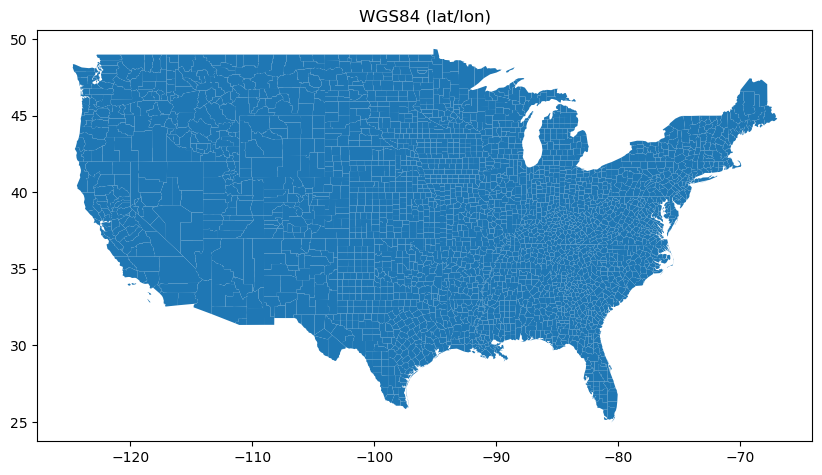

In [16]:
# visualize
ax = usa.plot(figsize=(10, 10))
ax.set_title("WGS84 (lat/lon)");

In [17]:
# Reproject to Albers contiguous USA
usa = usa.to_crs("ESRI:102003")

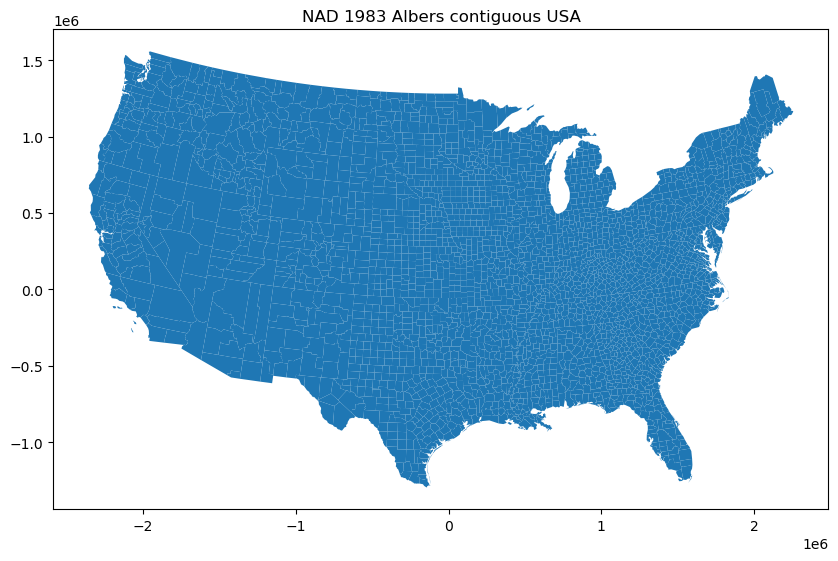

In [18]:
ax = usa.plot(figsize=(10, 10))
ax.set_title("NAD 1983 Albers contiguous USA");

### Projection for multiple geometry columns
GeoPandas 0.8 implements support for different projections assigned to different geometry columns of the same GeoDataFrame. The projection is now stored together with geometries per column (directly on the GeometryArray level).

Note that if GeometryArray has an assigned projection, it cannot be overridden by an another inconsistent projection during the creation of a GeoSeries or GeoDataFrame:

```python
>>> array.crs
<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
...
>>> GeoSeries(array, crs=4326)  # crs=4326 is okay, as it matches the existing CRS
>>> GeoSeries(array, crs=3395)  # crs=3395 is forbidden as array already has CRS
ValueError: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoSeries.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoSeries.to_crs(crs)' to reproject geometries.
    GeoSeries(array, crs=3395).crs
```

If you want to overwrite the projection, you can then assign it to the GeoSeries manually or re-project geometries to the target projection using either *`GeoSeries.set_crs(epsg=3395, allow_override=True)`* or *`GeoSeries.to_crs(epsg=3395)`*.

All GeometryArray-based operations preserve projection; however, if you loop over a column containing geometry, this information might be lost.

### Upgrading to GeoPandas 0.7 with pyproj > 2.2 and PROJ > 6
Starting with GeoPandas 0.7, the .crs attribute of a GeoSeries or GeoDataFrame stores the CRS information as a [`pyproj.CRS`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS), and no longer as a proj4 string or dict.

Before, you might have seen this:

```python
>>> gdf.crs
{'init': 'epsg:4326'}
```

while now you will see something like this:
```python
>>> gdf.crs
<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
...
>>> type(gdf.crs)
pyproj.crs.CRS
```

This gives a better user interface and integrates improvements from pyproj and PROJ 6, but might also require some changes in your code. See [this blogpost](https://jorisvandenbossche.github.io/blog/2020/02/11/geopandas-pyproj-crs/) for some more information. The subsections below cover different possible migration issues.

See the [pyproj documentation](https://pyproj4.github.io/pyproj/stable/) for more on the [`pyproj.CRS`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS) object.

### Importing data from files
When reading geospatial files with [`geopandas.read_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas.read_file), things should mostly work out of the box. For example, reading the example countries dataset yields a proper CRS:

In [20]:
geodatasets.get_path('naturalearth.land')

'/home/yousef/.cache/geodatasets/ne_110m_land.zip'

In [21]:
df = geopandas.read_file(geodatasets.get_path('naturalearth.land'))
df.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


<Axes: >

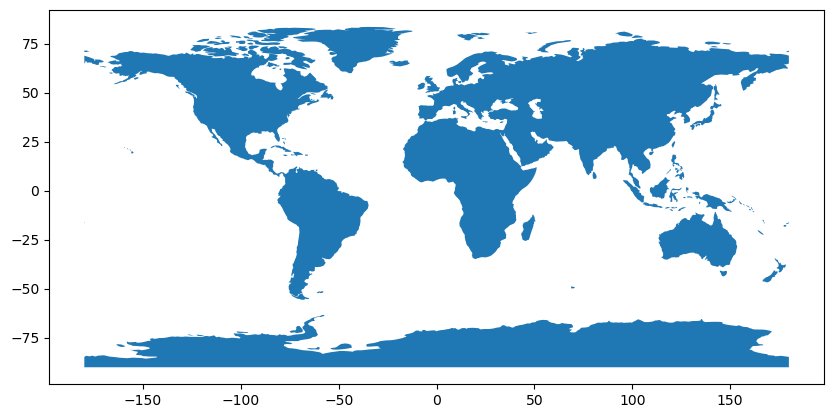

In [22]:
df.plot(figsize=(10, 10))

In [23]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

However, in certain cases (with older CRS formats), the resulting CRS object might not be fully as expected. See the [section below](https://geopandas.org/en/stable/docs/user_guide/projections.html#unrecognized-crs-reasons) for possible reasons and how to solve it.

### Manually specifying the CRS
When specifying the CRS manually in your code (e.g., because your data has not yet a CRS, or when converting to another CRS), this might require a change in your code.

**“init” proj4 strings/dicts**

Currently, a lot of people (and also the GeoPandas docs showed that before) specify the EPSG code using the “init” proj4 string:
```python
## OLD
GeoDataFrame(..., crs={'init': 'epsg:4326'})
# or
gdf.crs = {'init': 'epsg:4326'}
# or
gdf.to_crs({'init': 'epsg:4326'})
```

The above will now raise a deprecation warning from pyproj, and instead of the “init” proj4 string, you should use only the EPSG code itself as follows:

```python
## NEW
GeoDataFrame(..., crs="EPSG:4326")
# or
gdf.crs = "EPSG:4326"
# or
gdf.to_crs("EPSG:4326")
```

**proj4 strings/dicts**

Although a full proj4 string is not deprecated (as opposed to the “init” string above), it is still recommended to change it with an EPSG code if possible.

For example, if you know the EPSG code for the projection you are using, instead of:
```python
gdf.crs = "+proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs"
```

this is recommended:
```python
gdf.crs = "EPSG:2163"
```

One possible way to find out the EPSG code is using pyproj for this:

In [26]:
import pyproj
crs = pyproj.CRS(
    "+proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs"
)

In [31]:
crs.to_epsg

<bound method CRS.to_epsg of <Projected CRS: +proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0 +a= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: Unknown based on Normal Sphere (r=6370997) ellipsoid
- Ellipsoid: Normal Sphere (r=6370997)
- Prime Meridian: Greenwich
>

(you might need to set the *`min_confidence`* keyword of *`to_epsg`* to a lower value if the match is not perfect)

Further, on websites such as [Spatial Reference](https://spatialreference.org/) and [epsg.io](https://epsg.io/) the descriptions of many CRS can be found including their EPSG codes and proj4 string definitions.

#### Other formats

Next to the EPSG code mentioned above, there are also other ways to specify the CRS: an actual [`pyproj.CRS`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS) object, a WKT string, a PROJ JSON string, etc. Anything that is accepted by [`pyproj.CRS.from_user_input()`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS.from_user_input) can by specified to the *`crs`* keyword/attribute in GeoPandas.

Also compatible CRS objects, such as from the [`rasterio`](https://rasterio.readthedocs.io/en/stable/api/rasterio.html#module-rasterio) package, can be passed directly to GeoPandas.

### The axis order of a CRS
Starting with PROJ 6 / pyproj 2, the axis order of the official EPSG definition is honoured. For example, when using geographic coordinates (degrees of longitude and latitude) in the standard EPSG:4326, the CRS will look like:
```python
>>> pyproj.CRS("EPSG:4326")
<Geographic 2D CRS: EPSG:4326>
...
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
...
```

This mentions the order as (lat, lon), as that is the official order of coordinates in EPSG:4326. In GeoPandas, however, the coordinates are always stored as (x, y), and thus as (lon, lat) order, regardless of the CRS (i.e. the “traditional” order used in GIS). When reprojecting, GeoPandas and pyproj will under the hood take care of this difference in axis order, so the user doesn’t need to care about this.

### Why is it not properly recognizing my CRS?
There are many file sources and CRS definitions out there “in the wild” that might have a CRS description that does not fully conform to the new standards of PROJ > 6 (proj4 strings, older WKT formats, …). In such cases, you will get a [`pyproj.CRS`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS) object that might not be fully what you expected (e.g. not equal to the expected EPSG code). Below is a list of a few possible cases.

### I get a “Bound CRS”?
Some CRS definitions include a “towgs84” clause, which can give problems in recognizing the actual CRS.

For example, both the proj4 and WKT representations for [EPSG:31370](https://spatialreference.org/ref/epsg/31370/) (the local projection used in Belgium) as can be found at EPSG:31370 include this clause. When taking one of those definitions from that site, and creating a CRS object:

In [32]:
import pyproj
crs = pyproj.CRS(
    "+proj=lcc +lat_1=51.16666723333333 +lat_2=49.8333339 +lat_0=90 +lon_0=4.367486666666666 +x_0=150000.013 +y_0=5400088.438 +ellps=intl +towgs84=106.869,-52.2978,103.724,-0.33657,0.456955,-1.84218,1 +units=m +no_defs"
)
crs

<Bound CRS: +proj=lcc +lat_1=51.16666723333333 +lat_2=49.83333 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on International 1924 (Hayford 1909, 1910) ellipsoid using towgs84=106.869,-52.2978,103.724,-0.33657,0.456955,-1.84218,1
- Ellipsoid: International 1924 (Hayford 1909, 1910)
- Prime Meridian: Greenwich
Source CRS: unknown

You notice that the above is a not a “Projected CRS” as expected, but a “Bound CRS”. This is because it is “bound” to a conversion to WGS84, and will always use this when reprojecting instead of letting PROJ determine the best conversion.

To get the actual underlying projected CRS, you can use the *`.source_crs`* attribute:

In [33]:
crs.source_crs

<Projected CRS: PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unk ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: Unknown based on International 1924 (Hayford 1909, 1910) ellipsoid using towgs84=106.869,-52.2978,103.724,-0.33657,0.456955,-1.84218,1
- Ellipsoid: International 1924 (Hayford 1909, 1910)
- Prime Meridian: Greenwich

Now you have a “Projected CRS”, and now it will also recognize the correct EPSG number:

In [34]:
crs.to_epsg()

In [35]:
crs.source_crs.to_epsg()

31370

### I have a different axis order?
As mentioned above, pyproj now honours the axis order of the EPSG definition. However, proj4 strings or older WKT versions don’t specify this correctly, which can be a reason that the CRS object is not equal to the expected EPSG code.

Consider the following example of a Canadian projected CRS EPSG:2953. When constructing the CRS object from the WKT string as provided on [EPSG:2953](https://epsg.io/2953):

In [36]:
crs = pyproj.CRS("""PROJCS["NAD83(CSRS) / New Brunswick Stereographic",
        GEOGCS["NAD83(CSRS)",
        DATUM["NAD83_Canadian_Spatial_Reference_System",
        SPHEROID["GRS 1980",6378137,298.257222101,
        AUTHORITY["EPSG","7019"]],
        AUTHORITY["EPSG","6140"]],
        PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4617"]],
        PROJECTION["Oblique_Stereographic"],
        PARAMETER["latitude_of_origin",46.5],
        PARAMETER["central_meridian",-66.5],
        PARAMETER["scale_factor",0.999912],
        PARAMETER["false_easting",2500000],
        PARAMETER["false_northing",7500000],
        UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
        AUTHORITY["EPSG","2953"]]""")
crs

<Projected CRS: PROJCS["NAD83(CSRS) / New Brunswick Stereographic" ...>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Although this is the WKT string as found online for “EPSG:2953”, this CRS object does not evaluate equal to this EPSG code:

In [37]:
crs == "EPSG:2953"

False

If you construct the CRS object from the EPSG code (truncated output):

In [38]:
pyproj.CRS("EPSG:2953")

<Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

You can see that the CRS object constructed from the WKT string has a “Easting, Northing” (i.e. x, y) axis order, while the CRS object constructed from the EPSG code has a (Northing, Easting) axis order.

Only having this difference in axis order is no problem when using the CRS in GeoPandas, since GeoPandas always uses a (x, y) order to store the data regardless of the CRS definition. But, you might still want to verify it is equivalent to the expected EPSG code. By lowering the min_confidence, the axis order will be ignored:

In [39]:
crs.to_epsg()
crs.to_epsg(min_confidence=20)

2953

### The *`.crs`* attribute is no longer a dict or string
If you relied on the *`.crs`* object being a dict or a string, such code can be broken given it is now a [`pyproj.CRS`] object. But this object actually provides a more robust interface to get information about the CRS.

For example, if you used the following code to get the EPSG code:
```python
gdf.crs['init']
```

This will no longer work. To get the EPSG code from a *`crs`* object, you can use the [`to_epsg()`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS.to_epsg) method.

Or to check if a CRS was a certain UTM zone:
```python
'+proj=utm ' in gdf.crs
```

could be replaced with the more robust check (requires pyproj 2.6+):
```python
gdf.crs.utm_zone is not None
```

And there are many other methods available on the [`pyproj.CRS`](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS) class to get information about the CRS.